In [1]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt #used to generate the legends
from typing import List

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension: provaNewFirms
Current folders are:
provaNewFirms.0


### uncomment to show all the rows in tables

In [2]:
#display all the rows of the dataframe  
pd.set_option('display.max_rows', None)

# creation of firm dataframes

In [3]:
#each firm will have its dataframe
#containing the values of the names of the columns for all the time units (rows)
colNames=["firm class type", "initial inventories","total costs", "revenuesCons", "revenuesInv", "inventories",\
          "in progr. inventories", "profits", "added value", "total production", "cost of production", "cost of unused factors",\
          "total lost production", "total cost of lost production", "cost of labor", "cost of capital",\
          "capital quantity dynamic", "production type"]

#fileNameArray is the array that will contain the names of the file of the balance sheets (one file for each firm), 
#subdivided by ranks in the columns of the array; 'itemsize=len(fileNameRoot)+30' is supposed to be sufficient to 
#report the names of the file;
fileNameArray=np.chararray((ag0num, rankNum), itemsize=len(fileNameRoot)+30, unicode=True)

In [4]:
#operating by folders to load the names of the files reported in the balancesheetList files
for k in range(rankNum):
    #which folder
    os.chdir("../"+folder+"."+str(k))
    with open(fileNameRoot+"_balancesheetList_"+str(k)+".csv","r") as fileList:
        reader = csv.reader(fileList, delimiter = ',')
        #read the name of the files, containing _balancesheetList_, present in the current set of folders
        for row in reader:
            for i in range(len(row)):
                fileNameArray[i,k]=row[i]

                

In [5]:
#creating a dictionary of firm dataframes
firmData={}
for k in range(rankNum):
    #in the folder with name extension == k
    os.chdir("../"+folder+"."+str(k))
    #repeating for the number of agent type 0 in each folder
    for i in range(ag0num):
        #extracting the agent uid from the name of the file
        p1=fileNameArray[i,k].find('(')
        p2=fileNameArray[i,k].find(')')+1
        uid=fileNameArray[i,k][p1:p2]
        #filling the dictionary with uids as keys and the balancesheetLists of the related firm as values
        firmData[uid]=pd.read_csv(fileNameArray[i,k], header=None)

#naming the firm dataframe columns, firm by firm, by scrolling the keys of the dictionary
for aFirm in firmData.keys():
    firmData[aFirm].columns=colNames

# Retrieve a firm

In [6]:
#retrieve a firm with id and rank
def retrieveFirmBalancesheet(id,r):
    return firmData['('+str(id)+', 0, '+str(r)+')']

In [7]:
#example
retrieveFirmBalancesheet(0,0)

,firm class type,initial inventories,total costs,revenuesCons,revenuesInv,inventories,in progr. inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,capital quantity dynamic,production type
0,0.0,0.000000,208.719218,0.0,0.000000,0.000000,34.000000,-174.719218,34.000000,9.117765,34.000000,174.719218,0.0,0.0,80.0,70.210482,0.000000,1.0
1,0.0,34.000000,208.719218,0.0,0.000000,0.000000,87.833333,-154.885884,53.833333,14.553033,53.833333,154.885884,0.0,0.0,80.0,70.210482,0.000000,1.0
2,0.0,87.833333,208.719218,0.0,0.000000,0.000000,158.666667,-137.885884,70.833333,18.985262,70.833333,137.885884,0.0,0.0,80.0,70.210482,0.000000,1.0
3,0.0,158.666667,208.719218,0.0,0.000000,0.000000,257.833333,-109.552551,99.166667,26.265207,99.166667,109.552551,0.0,0.0,80.0,70.210482,0.000000,1.0
4,0.0,257.833333,208.719218,0.0,0.000000,0.000000,399.500000,-67.052551,141.666667,38.170845,141.666667,67.052551,0.0,0.0,80.0,70.210482,0.000000,1.0
5,0.0,399.500000,208.719218,0.0,0.000000,0.000000,592.166667,-16.052551,192.666667,51.824853,192.666667,16.052551,0.0,0.0,80.0,70.210482,0.000000,1.0
6,0.0,592.166667,208.719218,0.0,121.279447,4.147036,699.833333,24.373931,233.093149,51.824853,192.666667,16.052551,0.0,0.0,80.0,70.210482,0.000000,1.0
7,0.0,703.980369,208.719218,0.0,3.407667,1.875258,884.000000,-23.416662,185.302556,49.289107,184.166667,24.552551,0.0,0.0,80.0,70.210482,0.000000,1.0
8,0.0,885.875258,208.719218,0.0,522.238276,129.716407,592.166667,149.526874,358.246092,49.289107,184.166667,24.552551,0.0,0.0,80.0,70.210482,0.000000,1.0
9,0.0,721.883074,208.719218,0.0,171.321556,15.502037,779.166667,35.387968,244.107185,50.126494,187.000000,21.719218,0.0,0.0,80.0,70.210482,0.000000,1.0


# The allFirmData dataframe

In [8]:
#create a dataframe summing up all the firm dataframes
allFirmData=firmData[list(firmData.keys())[0]].copy() #copy the dataframe of first firm; use .copy to create an
                                                      #independent copy with a new name

for aFirmUid in list(firmData.keys())[1:]: #from the second to the last
    allFirmData=allFirmData.add(firmData[aFirmUid])

allFirmData.__description__="all firms"

In [9]:
allFirmData

,firm class type,initial inventories,total costs,revenuesCons,revenuesInv,inventories,in progr. inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,capital quantity dynamic,production type
0,260.0,0.000000,4978.541277,140.115248,0.000000,35.353724,494.527778,-4308.544528,669.996749,187.178458,623.291667,4355.249610,0.0,0.0,2178.0,1527.567969,0.000000,5.0
1,260.0,529.881501,4978.541277,263.460030,0.000000,73.144259,1516.388889,-3655.429600,1323.111677,372.133426,1235.291667,3743.249610,0.0,0.0,2178.0,1527.567969,0.000000,5.0
2,260.0,1589.533148,4978.541277,614.870785,0.000000,179.397069,2472.444444,-3301.362127,1677.179150,427.392646,1472.222222,3506.319055,0.0,0.0,2178.0,1527.567969,0.000000,5.0
3,260.0,2651.841514,4978.541277,491.978198,0.000000,165.147715,3968.222222,-3005.034656,1973.506622,525.425697,1809.513889,3169.027388,0.0,0.0,2178.0,1527.567969,0.000000,5.0
4,260.0,4133.369937,4978.541277,1241.048354,497.681726,407.133218,4645.194444,-2320.853473,2657.687804,596.595867,2078.111111,2900.430166,0.0,0.0,2178.0,1527.567969,0.000000,5.0
5,260.0,5052.327662,4978.541277,1946.673280,334.934693,557.686236,5285.527778,-1906.046953,3072.494324,668.074402,2311.958333,2666.582944,0.0,0.0,2178.0,1527.567969,0.000000,5.0
6,260.0,5843.214014,5420.541277,2037.363891,510.246928,512.570690,6023.805556,-2179.768226,3240.773051,691.726771,2391.569444,3028.971833,0.0,0.0,2620.0,1648.409449,399.256590,5.0
7,260.0,6536.376246,5758.297360,2424.182841,722.783315,776.440475,6565.166667,-1806.100308,3952.197052,884.687794,2903.208333,2855.089027,0.0,0.0,2749.0,1737.022941,203.667577,5.0
8,260.0,7341.607142,6149.668096,3198.146774,1215.994237,934.888135,6340.472222,-1801.773870,4347.894226,877.027004,2876.513889,3273.154207,0.0,0.0,3037.0,1896.473955,470.220809,5.0
9,260.0,7275.360357,6735.967521,3308.140905,683.968027,838.121068,6759.888889,-2421.208988,4314.758533,914.731743,2984.055556,3751.911965,0.0,0.0,3381.0,2209.170994,449.171351,5.0


In [10]:
allFirmData.__description__

'all firms'

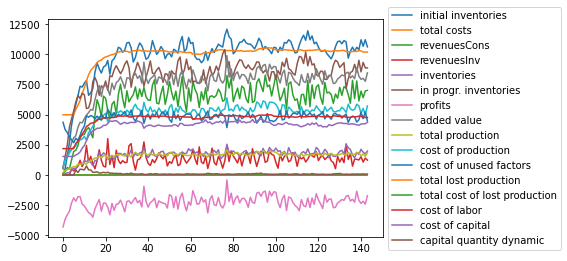

In [11]:
allFirmData.drop(['firm class type', 'production type'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot: >

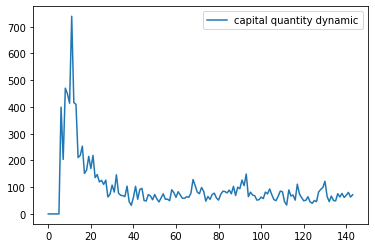

In [12]:
allFirmData[['capital quantity dynamic']].plot()

<AxesSubplot: >

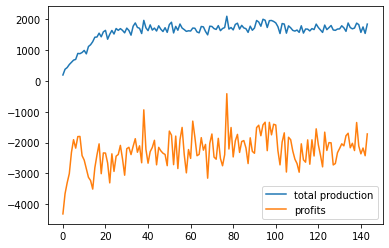

In [13]:
allFirmData[['total production', 'profits']].plot()

<AxesSubplot: >

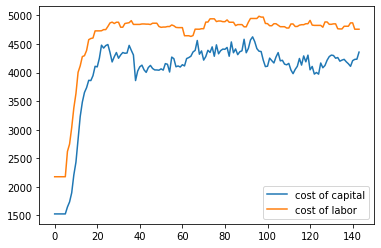

In [14]:
allFirmData[['cost of capital','cost of labor']].plot()

<AxesSubplot: >

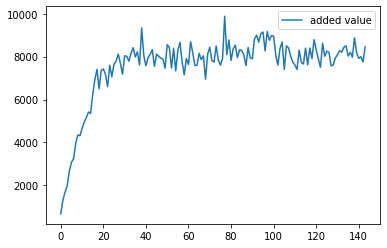

In [15]:
allFirmData[['added value']].plot()

# Considering groups of firms

In [16]:
#summarize a subset of balancesheets of firm with 'dimensional class' in a given list
def sumBalancesheetsWithAGivenDimensionalClass(dimClassList: List):
    tmpDict={}
    for aFirmUid in list(firmData.keys())[:]:
        if firmData[aFirmUid]['firm class type'].loc[0] in dimClassList:
            tmpDict[aFirmUid]=firmData[aFirmUid]
    print("found",len(tmpDict), "firms")
    
    if tmpDict=={}: return 0 #firms with the required dimensional class: not found
        
    allLocalFirmData=tmpDict[list(tmpDict.keys())[0]].copy() #copy the dataframe of first firm; use .copy to create an
                                                              #independent copy with a new name

    for aFirmUid in list(tmpDict.keys())[1:]: #from the second to the last
        allLocalFirmData=allLocalFirmData.add(tmpDict[aFirmUid])

    memo="firms of groups"
    for g in dimClassList: memo = memo +" "+str(g)
    allLocalFirmData.__description__= memo
    
    return allLocalFirmData


In [17]:
#example with dimensional class 0
sumOfBalanceSheetSubset = sumBalancesheetsWithAGivenDimensionalClass([0])

found 5 firms


In [18]:
sumOfBalanceSheetSubset.__description__

'firms of groups 0'

In [19]:
sumOfBalanceSheetSubset

,firm class type,initial inventories,total costs,revenuesCons,revenuesInv,inventories,in progr. inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,capital quantity dynamic,production type
0,0.0,0.000000,957.296856,0.0,0.000000,0.000000,155.833333,-801.463522,155.833333,42.958621,155.833333,801.463522,0.0,0.0,364.0,323.616467,0.000000,5.0
1,0.0,155.833333,957.296856,0.0,0.000000,0.000000,481.666667,-631.463522,325.833333,89.766346,325.833333,631.463522,0.0,0.0,364.0,323.616467,0.000000,5.0
2,0.0,481.666667,957.296856,0.0,0.000000,0.000000,906.666667,-532.296856,425.000000,116.750034,425.000000,532.296856,0.0,0.0,364.0,323.616467,0.000000,5.0
3,0.0,906.666667,957.296856,0.0,0.000000,0.000000,1428.000000,-435.963522,521.333333,140.589760,521.333333,435.963522,0.0,0.0,364.0,323.616467,0.000000,5.0
4,0.0,1428.000000,957.296856,0.0,497.681726,93.212183,1666.000000,-128.402947,828.893909,177.799590,663.000000,294.296856,0.0,0.0,364.0,323.616467,0.000000,5.0
5,0.0,1759.212183,957.296856,0.0,334.934693,82.422388,2201.500000,-97.651958,859.644898,200.398141,748.000000,209.296856,0.0,0.0,364.0,323.616467,0.000000,5.0
6,0.0,2283.922388,957.296856,0.0,510.246928,31.257769,2703.000000,3.285454,960.582309,211.468467,790.500000,166.796856,0.0,0.0,364.0,323.616467,0.000000,5.0
7,0.0,2734.257769,957.296856,0.0,722.783315,243.568892,2822.000000,96.797583,1054.094438,217.175400,813.166667,144.130189,0.0,0.0,364.0,323.616467,0.000000,5.0
8,0.0,3065.568892,957.296856,0.0,1215.994237,248.906068,2822.000000,264.034557,1221.331412,216.620578,816.000000,141.296856,0.0,0.0,364.0,323.616467,0.000000,5.0
9,0.0,3070.906068,957.296856,0.0,683.968027,132.927383,3275.333333,64.025820,1021.322676,210.908602,793.333333,163.963522,0.0,0.0,364.0,323.616467,0.000000,5.0


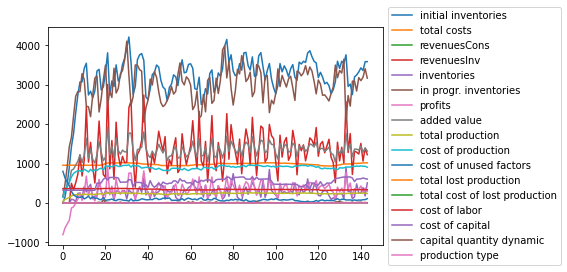

In [20]:
sumOfBalanceSheetSubset.drop(['firm class type'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot: >

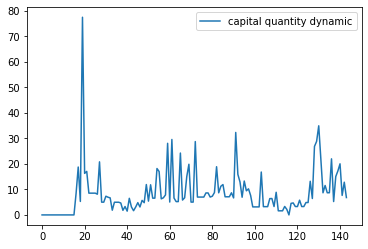

In [21]:
sumOfBalanceSheetSubset[['capital quantity dynamic']].plot()

<AxesSubplot: >

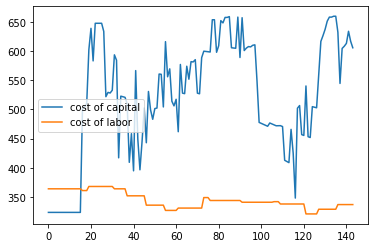

In [22]:
sumOfBalanceSheetSubset[['cost of capital', 'cost of labor']].plot()

# The National Economic Balance Table

In [23]:
allFirmData['consumptions']=allFirmData['revenuesCons']
allFirmData['investments']=allFirmData['revenuesInv']
allFirmData[['initial inventories', 'added value', 'consumptions', 'investments','in progr. inventories','inventories']]

,initial inventories,added value,consumptions,investments,in progr. inventories,inventories
0,0.000000,669.996749,140.115248,0.000000,494.527778,35.353724
1,529.881501,1323.111677,263.460030,0.000000,1516.388889,73.144259
2,1589.533148,1677.179150,614.870785,0.000000,2472.444444,179.397069
3,2651.841514,1973.506622,491.978198,0.000000,3968.222222,165.147715
4,4133.369937,2657.687804,1241.048354,497.681726,4645.194444,407.133218
5,5052.327662,3072.494324,1946.673280,334.934693,5285.527778,557.686236
6,5843.214014,3240.773051,2037.363891,510.246928,6023.805556,512.570690
7,6536.376246,3952.197052,2424.182841,722.783315,6565.166667,776.440475
8,7341.607142,4347.894226,3198.146774,1215.994237,6340.472222,934.888135
9,7275.360357,4314.758533,3308.140905,683.968027,6759.888889,838.121068


<AxesSubplot: >

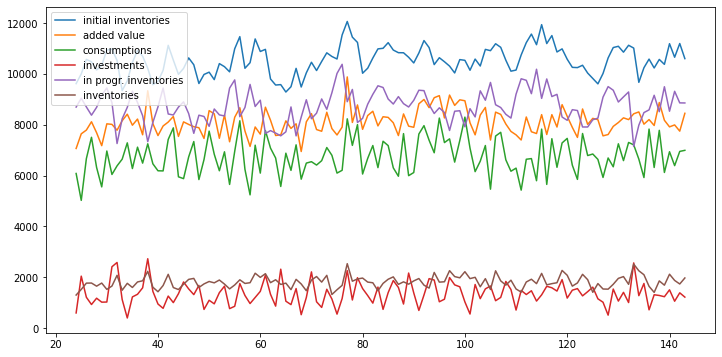

In [24]:
#allFirmData[['initial inventories', 'added value', 'consumptions',\
             #'investments','in progr. inventories','inventories']].plot(figsize=(12,6))

allFirmData[['initial inventories', 'added value', 'consumptions',\
             'investments','in progr. inventories','inventories']][24:].plot(figsize=(12,6))
